<a href="https://colab.research.google.com/github/sonhs99/MachineLearning/blob/master/Assignmnet07/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignmnet07

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data-nonlinear.txt to data-nonlinear.txt
User uploaded file "data-nonlinear.txt" with length 2233 bytes


In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

In [0]:
def sigmoid(x):
  return np.reciprocal(1 + np.exp(-x))

def energy(theta, data, lamda, label):
  temp = sigmoid(data@theta)
  return -(label*np.log(temp) + (1 - label)*np.log(1 - temp)).mean() + lamda*(theta**2).sum()/2

def generate(x, y):
  arr = []
  for i in range(0, 11):
    for j in range(0, 11):
      arr.append(x**i*y**j)
  return np.array(arr)

def accuracy(data, theta, label):
  pred = sigmoid(data@theta)
  right = ((pred > 0.5) == label).sum()
  return right / len(data)

In [0]:
def Learning(data, label, lamda):
  theta = [np.ones(data.shape[1])]
  e = [0]
  acc = []
  Lr = 1
  c = np.full(theta[-1].shape, 1)
  c[0] = 0

  tmp = energy(theta[-1], data, lamda, label)
  acc.append(accuracy(data, theta[-1], label))

  while tmp != e[-1]:
    e.append(tmp)
    theta.append(theta[-1].copy())

    temp = sigmoid(data@theta[-1]) - label
    temp2 = data.transpose()@temp
    theta[-1] -= Lr*temp2/data.shape[1] + Lr*lamda*theta[-1]*c
    tmp = energy(theta[-1], data, lamda, label)
    acc.append(accuracy(data, theta[-1], label))

  return theta, e, acc

In [0]:
lamda_0, lamda_1, lamda_2 = 1, 0.001, 0.000001
n_data = generate(pointX, pointY).transpose()
theta_0, e_0, acc_0 = Learning(n_data, label, lamda_0)
theta_1, e_1, acc_1 = Learning(n_data, label, lamda_1)
theta_2, e_2, acc_2 = Learning(n_data, label, lamda_2)

1. Plot the training data

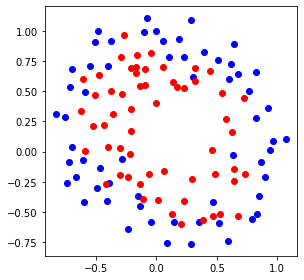

In [79]:
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

2. Plot the training error with varying regularization parameters

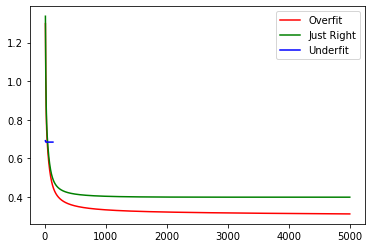

In [131]:
plt.figure()
plt.plot(range(10, 5000), e_2[10:5000], c = 'r')
plt.plot(range(10, 5000), e_1[10:5000], c = 'g')
plt.plot(range(10, len(e_0)), e_0[10:], c = 'b')

plt.legend(['Overfit', 'Just Right', 'Underfit'])
plt.show()

3. Display the values of the chosen regularization parameters


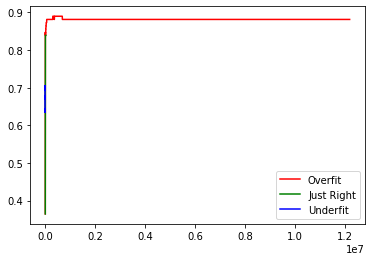

In [130]:
plt.plot(range(10, len(acc_2)), acc_2[10:], c = 'r')
plt.plot(range(10, len(acc_1)), acc_1[10:], c = 'g')
plt.plot(range(10, len(acc_0)), acc_0[10:], c = 'b')
plt.legend(['Overfit', 'Just Right', 'Underfit'])
plt.show()

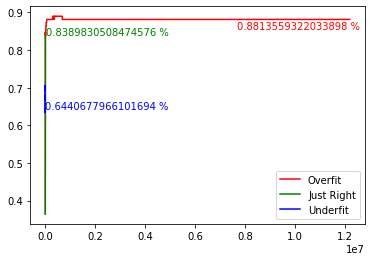

In [132]:
plt.plot(range(10, len(acc_2)), acc_2[10:], c = 'r')
plt.plot(range(10, len(acc_1)), acc_1[10:], c = 'g')
plt.plot(range(10, len(acc_0)), acc_0[10:], c = 'b')

plt.annotate(str(acc_2[-1]) + ' %', (len(acc_2), acc_2[-1]), (len(acc_2) - 250000*len(str(acc_2[-1])), acc_2[-2] - 0.025), c='r')
plt.annotate(str(acc_1[-1]) + ' %', (len(acc_1), acc_1[-1]), c='g')
plt.annotate(str(acc_0[-1]) + ' %', (len(acc_0), acc_0[-1]), c='b')

plt.legend(['Overfit', 'Just Right', 'Underfit'])
plt.show()

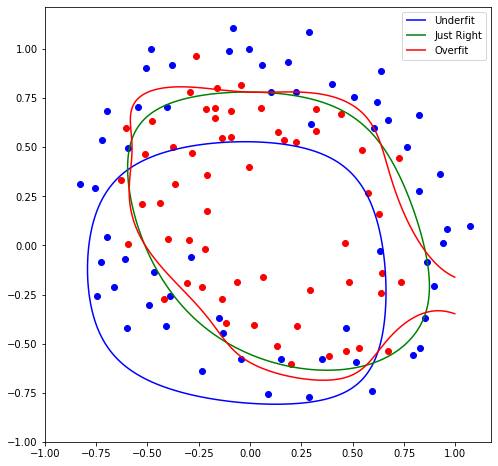

In [121]:
p_x, p_y = np.meshgrid(np.linspace(-1.0, 1.0, 400), np.linspace(-1.0, 1.0, 400))
p_z_0 = sigmoid(generate(p_x, p_y).transpose()@theta_0[-1])
p_z_1 = sigmoid(generate(p_x, p_y).transpose()@theta_1[-1])
p_z_2 = sigmoid(generate(p_x, p_y).transpose()@theta_2[-1])

plt.figure(figsize=(8, 8))
c0 = plt.contour(p_x, p_y, p_z_0, levels = [0.5], colors='b')
c1 = plt.contour(p_x, p_y, p_z_1, levels = [0.5], colors='g')
c2 = plt.contour(p_x, p_y, p_z_2, levels = [0.5], colors='r')
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

h0,_ = c0.legend_elements()
h1,_ = c1.legend_elements()
h2,_ = c2.legend_elements()

plt.legend(handles = [h0[0], h1[0], h2[0]], labels = ('Underfit', 'Just Right', 'Overfit'))
plt.show()